In [1]:
import matplotlib.image as mpimg
from matplotlib.animation import FuncAnimation

from IPython import display
import pynbody
import pynbody.plot.sph as sph
import matplotlib.pylab as plt
from pathlib import Path
import numpy as np

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


demo.tipsy
demo.tipsy
000010
000020
000030
000040
000050
000060
000070
000080
000090
000100
000110
000120
000130
000140
000150
000160
000170
000180
000190
000200
000210
000220
000230
000240
000250
000260
000270
000280
000290
000300
000310
000320
000330
000340
000350
000360
000370
000380
000390
000400
000410
000420
000430
000440
000450
000460
000470
000480
000490
000500
000510
000520
000530
000540
000550
000560
000570
000580
000590
000600
000610
000620
000630
000640
000650
000660
000670
000680
000690
000700
000710
000720
000730
000740
000750
000760
000770
000780
000790
000800
000810
000820
000830
000840
000850
000860
000870
demo.tipsy


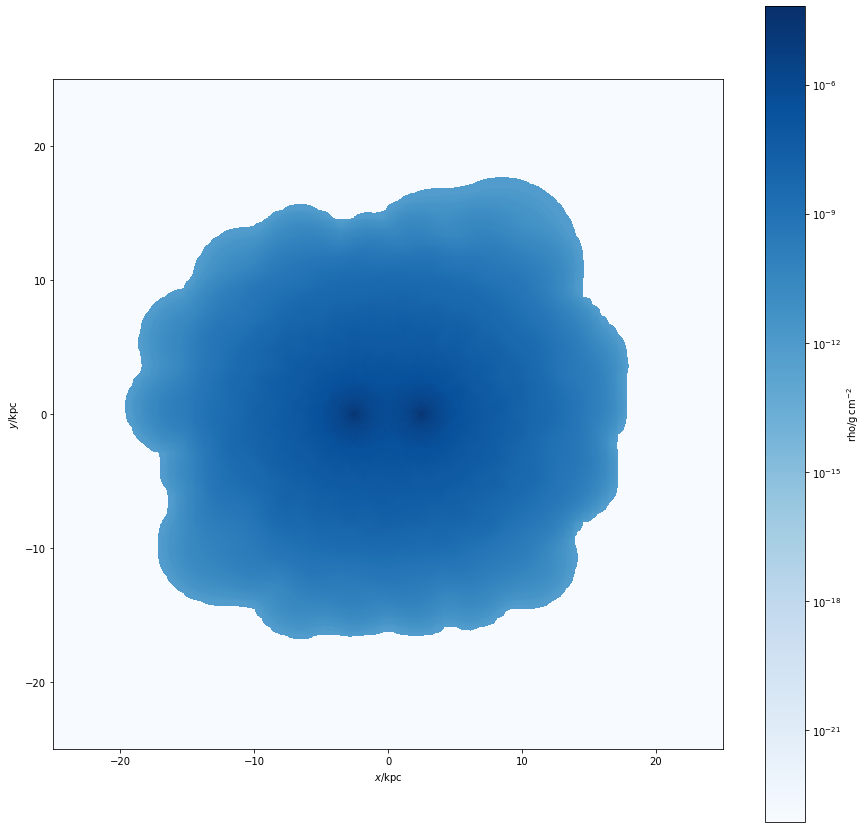

In [6]:
fig = plt.figure(figsize=(15,15));
a = np.arange(10,880,10)
files = ['demo.tipsy']
for value in a:
    entry = str(value).zfill(6)
    files.append(entry)
def animate(i, files=files):
    file=pynbody.load('./OutputsLong/CombinedTest.' + files[i]);
    print(files[i])
    plot = sph.image(file,qty="rho",units="g cm^-2",width=50, log=True, cmap="Blues", resolution = 2500)
    return plot

anim = FuncAnimation(fig, animate, frames=88, interval=30, blit=False)
anim.save('CombinedAnimation.gif', writer='PillowWriter')

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


demo.tipsy
demo.tipsy
000001
000002
000003
000004
000005
000006
000007
000008
000009
000010
000011
000012
000013
000014
000015
000016
000017
000018
000019
000020
000021
000022
000023
000024
000025
000026
000027
000028
000029
000030
000031
000032
000033
000034
000035
000036
000037
000038
000039
000040
000041
000042
000043
000044
000045
000046
000047
000048
000049
000050
000051
000052
000053
000054
000055
000056
000057
000058
000059
000060
000061
000062
000063
000064
000065
000066
000067
000068
000069
000070
000071
000072
000073
000074
000075
000076
000077
000078
000079
000080
000081
000082
000083
000084
000085
000086
000087
000088
000089
000090
000091
000092
000093
000094
000095
000096
000097
000098
000099
000100
000101
000102
000103
000104
000105
000106
000107
000108
000109
000110
000111
000112
000113
000114
000115
000116
000117
000118
000119
000120
000121
000122
000123
000124
000125
000126
000127
000128
000129
000130
000131
000132
000133
000134
000135
000136
000137
000138
000139
00014

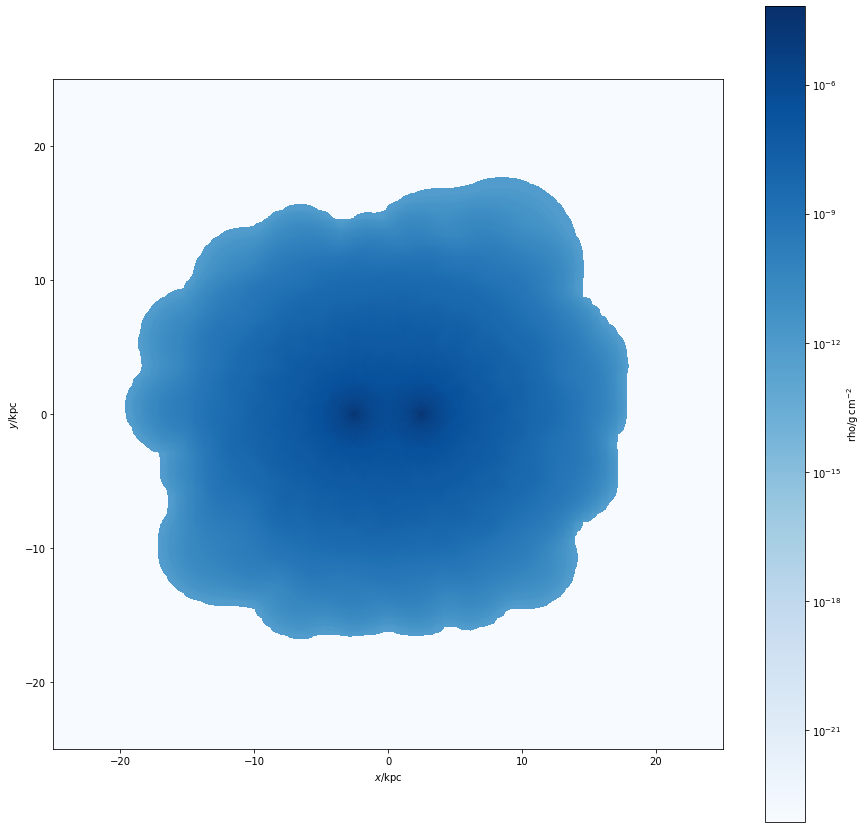

In [3]:
fig = plt.figure(figsize=(15,15));
a = np.arange(1,155,1)
files = ['demo.tipsy']
for value in a:
    entry = str(value).zfill(6)
    files.append(entry)
def animate(i, files=files):
    file=pynbody.load('./OutputsDemo/CombinedTest.' + files[i]);
    print(files[i])
    plot = sph.image(file,qty="rho",units="g cm^-2",width=50, log=True, cmap="Blues", resolution = 2500)
    return plot

anim = FuncAnimation(fig, animate, frames=155, interval=30, blit=False)
anim.save('CombinedAnimationDemo.gif', writer='PillowWriter')

In [8]:
test_init = pynbody.snapshot.tipsy.TipsySnap('./OutputsLong/CombinedTest.demo.tipsy')

In [9]:
test_end = pynbody.load('./OutputsLong/CombinedTest.000880')

In [4]:
len(test_end['pos'])

NameError: name 'test_end' is not defined

In [11]:
begx = []
begy = []
for particle in test_init['pos']:
    begx.append(particle[1])
    begy.append(particle[2])
    
endx = []
endy = []
for particle in test_end['pos']:
    endx.append(particle[1])
    endy.append(particle[2])

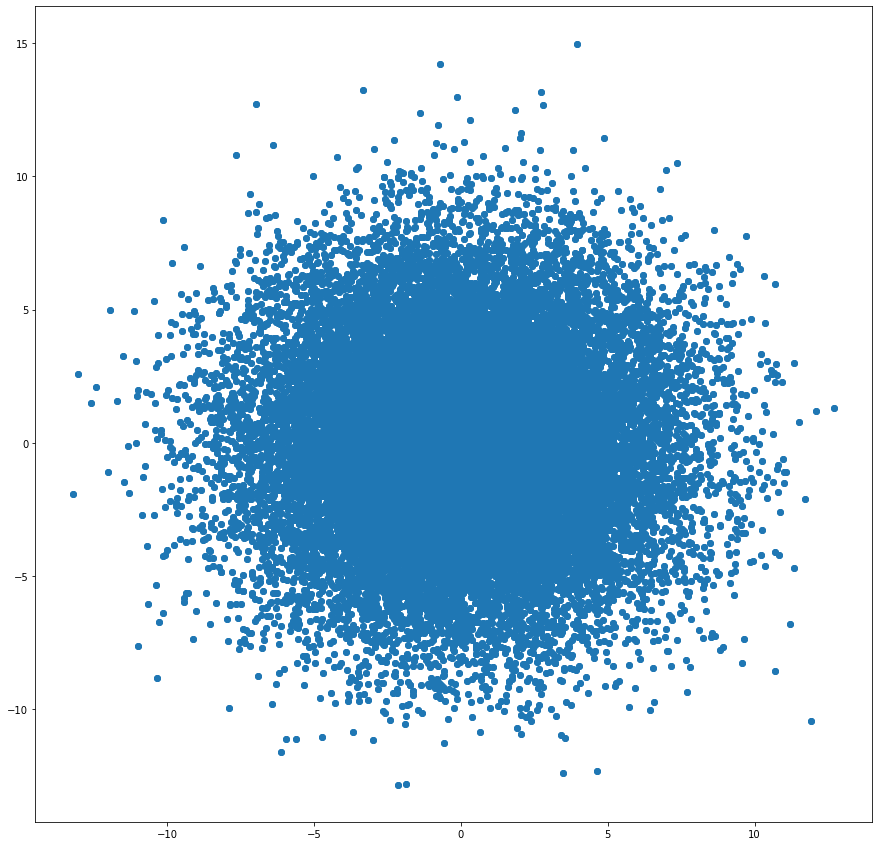

In [12]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(begx,begy)

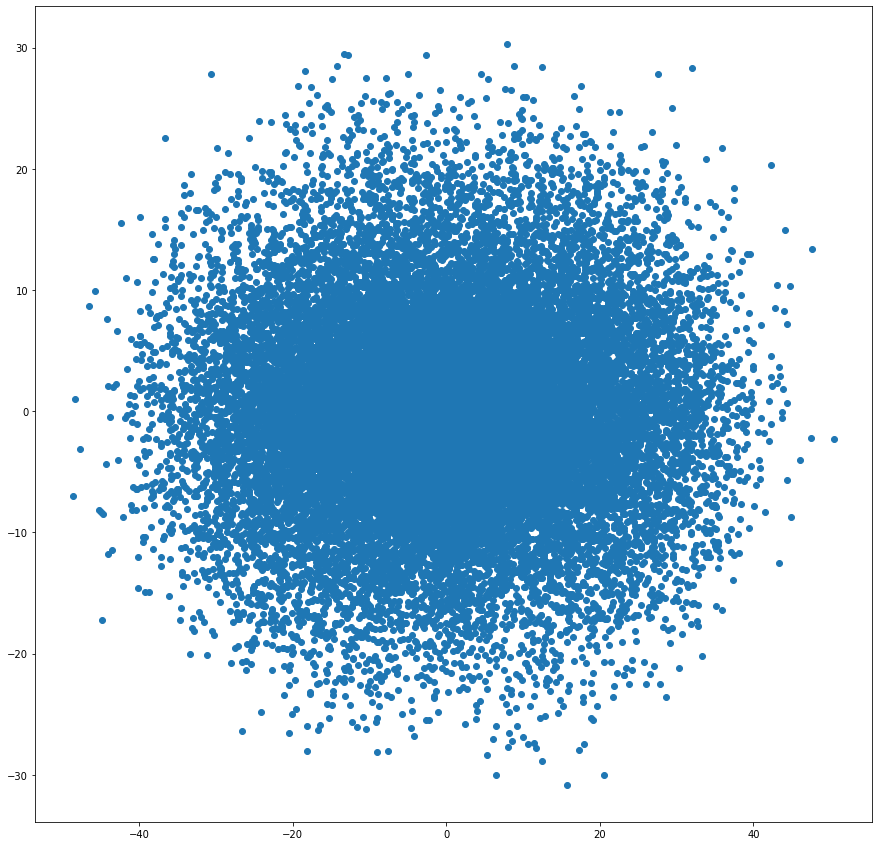

In [13]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(endx,endy)

MovieWriter PillowWriter unavailable; trying to use <class 'matplotlib.animation.PillowWriter'> instead.


demo.tipsy
demo.tipsy
000010
000020
000030
000040
000050
000060
000070
000080
000090
000100
000110
000120
000130
000140
000150
000160
000170
000180
000190
000200
000210
000220
000230
000240
000250
000260
000270
000280
000290
000300
000310
000320
000330
000340
000350
000360
000370
000380
000390
000400
000410
000420
000430
000440
000450
000460
000470
000480
000490
000500
000510
000520
000530
000540
000550
000560
000570
000580
000590
000600
000610
000620
000630
000640
000650
000660
000670
000680
000690
000700
000710
000720
000730
000740
000750
000760
000770
000780
000790
000800
000810
000820
000830
000840
000850
000860
000870


<Figure size 1080x1080 with 0 Axes>

demo.tipsy


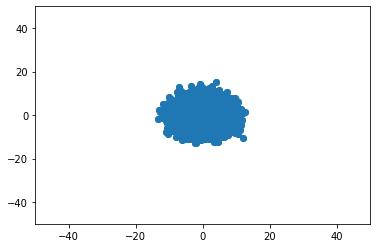

In [20]:
fig = plt.figure(figsize=(15,15));
a = np.arange(10,880,10)
files = ['demo.tipsy']
for value in a:
    entry = str(value).zfill(6)
    files.append(entry)
    
fig, ax = plt.subplots()
ax.set_ylim(-50,50)
ax.set_xlim(-50,50)
def animate(i, files=files, fig=fig, ax=ax):
    ax.set_ylim(-50,50)
    ax.set_xlim(-50,50)
    ax.clear()
    ax.set_ylim(-50,50)
    ax.set_xlim(-50,50)
    file=pynbody.load('./OutputsLong/CombinedTest.' + files[i]);
    print(files[i])
    x = []
    y = []
    for particle in file['pos']:
        x.append(particle[1])
        y.append(particle[2])

    
    plot = ax.scatter(x,y)
    ax.set_ylim(-50,50)
    ax.set_xlim(-50,50)
    return plot

anim = FuncAnimation(fig, animate, frames=88, interval=30, blit=False)
anim.save('CombinedAnimation3.gif', writer='PillowWriter')
